<a href="https://colab.research.google.com/github/Sambenjamin7/ANOVA/blob/main/ANOVA(assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, bartlett
import statsmodels.stats.multicomp as mc
import numpy as np 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
diabetes1 = pd.read_csv('Dataset of Diabetes  (1).csv')
diabetes1

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [ ]:
diabetes1['CLASS'] = diabetes1['CLASS'].replace(np.NaN, 'other')

In [ ]:
diabetes1['Gender'] = diabetes1['Gender'].replace(np.NaN, 'f')

In [ ]:
diabetes1.CLASS.value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [ ]:
diabetes1.Gender.value_counts()

M    565
F    434
f      1
Name: Gender, dtype: int64

Assignment start here 
DV: (Body Mass Index(initial but it is a string so it will not work)), Average Glucose level

IV: All contain 3 parameters 1.Smoking status: smokes, formerly smokes, never smokes
Gender: male, female, other
Work type: self employed, private, children,never worked, government job

In [ ]:
diabetes2 = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
diabetes2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
diabetes2 ['bmi'] = diabetes2 ['bmi'].replace(np.NaN,'None')

In [ ]:
diabetes2.bmi.value_counts()

None    201
28.7     41
28.4     38
26.1     37
27.6     37
       ... 
11.3      1
48.0      1
14.0      1
13.2      1
52.5      1
Name: bmi, Length: 419, dtype: int64

In [ ]:
diabetes2 ['gender'] = diabetes2 ['gender'].replace(np.NaN, 'Other')

In [ ]:
diabetes2.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Barlett Test/Homogenity Test 

In [ ]:
stats.bartlett(diabetes2['avg_glucose_level'][diabetes2['smoking_status'] == 'formerly smoked'],
               diabetes2['avg_glucose_level'][diabetes2['smoking_status'] == 'smokes'],
               diabetes2['avg_glucose_level'][diabetes2['smoking_status'] == 'never smoked'])

BartlettResult(statistic=16.556993178510275, pvalue=0.00025391865725707933)

In [ ]:
stats.bartlett(diabetes2['avg_glucose_level'][diabetes2['gender'] == 'Male'],
               diabetes2['avg_glucose_level'][diabetes2['gender'] == 'Female'])

BartlettResult(statistic=17.84684281024991, pvalue=2.3941616405943625e-05)

In [ ]:
stats.bartlett(diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Govt_job'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Never_worked'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Private'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'children'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Self-employed'])

BartlettResult(statistic=319.8230795459744, pvalue=5.726481665689854e-68)

In [ ]:
diabetes1 = pd.read_csv('Dataset of Diabetes  (1).csv')
diabetes1

assumptions



In [ ]:
model = smf.ols("bmi ~ C(work_type)", data = diabetes2).fit()
stats.shapiro(model.resid)

In [ ]:
model = smf.ols("bmi ~ C(smoking_status)", data = diabetes2).fit()
stats.shapiro(model.resid)

In [ ]:
model = smf.ols("bmi ~ C(gender)", data = diabetes2).fit()
stats.shapiro(model.resid)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.039049506187438965, 0.0)

In [ ]:
model = smf.ols("avg_glucose_level ~ C(work_type)", data = diabetes2).fit()
stats.shapiro(model.resid)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.822029709815979, 0.0)

In [ ]:
model = smf.ols("avg_glucose_level ~ C(gender)", data = diabetes2).fit()
stats.shapiro(model.resid)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8088995218276978, 0.0)

In [ ]:
model = smf.ols("avg_glucose_level ~ C(smoking_status)", data = diabetes2).fit()
stats.shapiro(model.resid)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8196660280227661, 0.0)

Kurtosis Test 

In [ ]:
model = smf.ols("avg_glucose_level ~ C(smoking_status)", data= diabetes2).fit()

stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.6443890725064267, pvalue=0.0)

In [ ]:
model = smf.ols("avg_glucose_level ~ C(gender)", data= diabetes2).fit()

stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.6470255561912177, pvalue=0.0)

In [ ]:
model = smf.ols("avg_glucose_level ~ C(work_type)", data= diabetes2).fit()

stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.6402227497748976, pvalue=0.0)

Histograms

In [ ]:
smoking_status1 = diabetes2[diabetes2['smoking_status'] == 'smokes']
smoking_status2 = diabetes2[diabetes2['smoking_status'] == 'never smoked']
smoking_status3 = diabetes2[diabetes2['smoking_status'] == 'formerly smoked']

In [ ]:
plt.hist(smoking_status1['avg_glucose_level'])
plt.show()

plt.hist(smoking_status2['avg_glucose_level'])
plt.show()

plt.hist(smoking_status3['avg_glucose_level'])
plt.show()

In [ ]:
gender1 = diabetes2[diabetes2['gender'] == 'Male']
gender2 = diabetes2[diabetes2['gender'] == 'Female']
gender3 = diabetes2[diabetes2['gender'] == 'Other']

In [ ]:
plt.hist(gender1['avg_glucose_level'])
plt.show()

plt.hist(gender2['avg_glucose_level'])
plt.show()

plt.hist(gender3['avg_glucose_level'])
plt.show()

In [ ]:
work_type1 = diabetes2[diabetes2['work_type'] == 'children']
work_type2 = diabetes2[diabetes2['work_type'] == 'Self-employed']
work_type3 = diabetes2[diabetes2['work_type'] == 'Private']
work_type4 = diabetes2[diabetes2['work_type'] == 'Govt_job']
work_type5 = diabetes2[diabetes2['work_type'] == 'Never_worked']

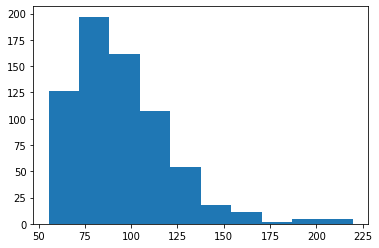

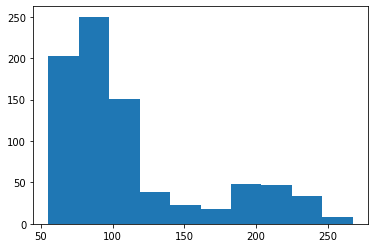

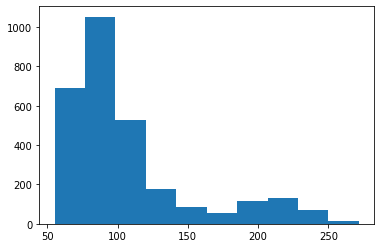

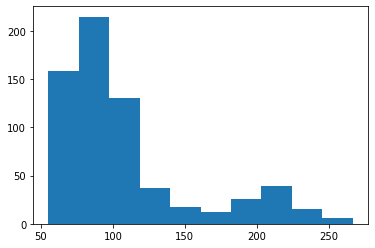

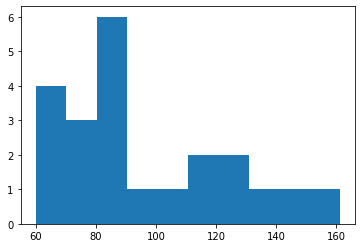

In [ ]:
plt.hist(work_type1['avg_glucose_level'])
plt.show()

plt.hist(work_type2['avg_glucose_level'])
plt.show()

plt.hist(work_type3['avg_glucose_level'])
plt.show()
plt.hist(work_type4['avg_glucose_level'])
plt.show()
plt.hist(work_type5['avg_glucose_level'])
plt.show()


ANOVA one-way test 

-this test is comparing the different outcomes of the multiple varibles on the avg sugar 

In [ ]:
stats.f_oneway(diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'children'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Self-employed'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Private'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Govt_job'],
               diabetes2['avg_glucose_level'][diabetes2['work_type'] == 'Never_worked'],)
              

F_onewayResult(statistic=16.61227264195557, pvalue=1.558660340511671e-13)

there is a difference between the sugar levels and the work types because the p levels are greater than 0.05 which means there is a normal distribution which allows us to reject the null hypothesis.

In [ ]:
stats.f_oneway(diabetes2['avg_glucose_level'][diabetes2['gender'] == 'Male'],
               diabetes2['avg_glucose_level'][diabetes2['gender'] == 'Female'],
               diabetes2['avg_glucose_level'][diabetes2['gender'] == 'Other'])

F_onewayResult(statistic=8.007533037840831, pvalue=0.00033714286225650867)

The results indicate that the p value levels is (<0.05) which means that there is a difference which means that we are unable to reject the null.

In [ ]:
stats.f_oneway(diabetes2['avg_glucose_level'][diabetes2['smoking_status'] == 'smokes'],
               diabetes2['avg_glucose_level'][diabetes2['smoking_status'] == 'never smoked'],
               diabetes2['avg_glucose_level'][diabetes2['smoking_status'] == 'formerly smoked'])

F_onewayResult(statistic=3.878053776374907, pvalue=0.02077844918635327)

This result indicates that the p value level is <0.05 which means that there is a significance in smoking status and suggar level. This also means that we are unable to reject the null hypothesis.

Post-hoc tests

-done after to find where the differneces are comingg from 

In [ ]:
comp = mc.MultiComparison(diabetes2['avg_glucose_level'], diabetes2['work_type'])
post_hoc_res2 = comp.tukeyhsd()
tukey1way2 = pd.DataFrame(post_hoc_res2.summary())

In [ ]:
print(post_hoc_res2)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
     Govt_job  Never_worked  -11.737 0.7225 -38.3568  14.8827  False
     Govt_job       Private  -0.9829    0.9  -6.2854   4.3196  False
     Govt_job Self-employed   4.8657  0.236  -1.5669  11.2982  False
     Govt_job      children -13.3795  0.001 -20.0815  -6.6775   True
 Never_worked       Private  10.7541 0.7717 -15.5291  37.0374  False
 Never_worked Self-employed  16.6027 0.4311  -9.9316   43.137  False
 Never_worked      children  -1.6425    0.9 -28.2434  24.9585  False
      Private Self-employed   5.8486  0.009   0.9932   10.704   True
      Private      children -12.3966  0.001 -17.6037  -7.1895   True
Self-employed      children -18.2452  0.001 -24.5993 -11.8911   True
--------------------------------------------------------------------


In [ ]:
print(tukey1way2)

                0              1         2       3         4         5       6
0          group1         group2  meandiff   p-adj     lower     upper  reject
1        Govt_job   Never_worked   -11.737  0.7225  -38.3568   14.8827   False
2        Govt_job        Private   -0.9829     0.9   -6.2854    4.3196   False
3        Govt_job  Self-employed    4.8657   0.236   -1.5669   11.2982   False
4        Govt_job       children  -13.3795   0.001  -20.0815   -6.6775    True
5    Never_worked        Private   10.7541  0.7717  -15.5291   37.0374   False
6    Never_worked  Self-employed   16.6027  0.4311   -9.9316    43.137   False
7    Never_worked       children   -1.6425     0.9  -28.2434   24.9585   False
8         Private  Self-employed    5.8486   0.009    0.9932    10.704    True
9         Private       children  -12.3966   0.001  -17.6037   -7.1895    True
10  Self-employed       children  -18.2452   0.001  -24.5993  -11.8911    True


In [ ]:
diabetes2[["work_type", "avg_glucose_level"]].groupby("work_type").mean()

,avg_glucose_level
work_type,
Govt_job,107.779772
Never_worked,96.042727
Private,106.796844
Self-employed,112.645446
children,94.400277


results of the type of work and the average suagr levels for each group

1.Govt_job and private = -0.9829
2. Never_worked and children = -1.6425
3.Private and self-emplyed = 5.8486
4.self-employed and children = -18.2452
5.Govt_job and never_worked = -11.737

In [ ]:
comp = mc.MultiComparison(diabetes2['avg_glucose_level'], diabetes2['gender'])
post_hoc_res = comp.tukeyhsd()
tukey1way = pd.DataFrame(post_hoc_res.summary())

In [ ]:
print(post_hoc_res)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
Female   Male   5.0307  0.001   2.0193   8.0421   True
Female  Other  39.2722 0.6468 -66.7629 145.3073  False
  Male  Other  34.2415 0.7105 -71.8009 140.2839  False
------------------------------------------------------


In [ ]:
print(tukey1way)

        0       1         2       3         4         5       6
0  group1  group2  meandiff   p-adj     lower     upper  reject
1  Female    Male    5.0307   0.001    2.0193    8.0421    True
2  Female   Other   39.2722  0.6468  -66.7629  145.3073   False
3    Male   Other   34.2415  0.7105  -71.8009  140.2839   False


In [ ]:
diabetes2[["gender", "avg_glucose_level"]].groupby("gender").mean()

,avg_glucose_level
gender,
Female,104.057809
Male,109.088520
Other,143.330000


The results are the significance differnece in the average sugar levels and the levels between male,female, and other. 
1. Female and male = 5.0307
2. Female and other = 39.2722
3. Male and other =34.2415 

In [ ]:
comp = mc.MultiComparison(diabetes2['avg_glucose_level'], diabetes2['smoking_status'])
post_hoc_res1 = comp.tukeyhsd()
tukey1way1 = pd.DataFrame(post_hoc_res1.summary())

In [ ]:
print(post_hoc_res1)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
        Unknown formerly smoked  13.2845  0.001   8.4031  18.166   True
        Unknown    never smoked   7.9566  0.001   3.9858 11.9273   True
        Unknown          smokes   8.4159  0.001   3.3492 13.4826   True
formerly smoked    never smoked   -5.328 0.0194  -10.043  -0.613   True
formerly smoked          smokes  -4.8686 0.1216 -10.5375  0.8002  False
   never smoked          smokes   0.4593    0.9  -4.4472  5.3659  False
-----------------------------------------------------------------------


In [ ]:
print(tukey1way1)

                 0                1         2  ...         4        5       6
0           group1           group2  meandiff  ...     lower    upper  reject
1          Unknown  formerly smoked   13.2845  ...    8.4031   18.166    True
2          Unknown     never smoked    7.9566  ...    3.9858  11.9273    True
3          Unknown           smokes    8.4159  ...    3.3492  13.4826    True
4  formerly smoked     never smoked    -5.328  ...   -10.043   -0.613    True
5  formerly smoked           smokes   -4.8686  ...  -10.5375   0.8002   False
6     never smoked           smokes    0.4593  ...   -4.4472   5.3659   False

[7 rows x 7 columns]


In [ ]:
diabetes2[["smoking_status", "avg_glucose_level"]].groupby("smoking_status").mean()

,avg_glucose_level
smoking_status,
Unknown,99.601541
formerly smoked,112.886079
never smoked,107.558092
smokes,108.017440


This is the result of the significance diffference betwwen the average sugar levles and the smoking status 

1.Unknown and formerly smoked-mean difference=13.2845
2.Unknown and smokes: mean difff =8.4159
3.Formerly smoked and smokes: mean diff = -4.8686
4.Formerly smoked and never smoked = -5.328
5.never smoked and smoked: mean diff = 0.4593   